In [8]:
# CONFIG
import os

RAW_DATA_DIR = '/root/hackathon/20230617_FinalLumbarSpine/BUU-LSPINE_vertebral_positions'
TGT_DATA_DIR = os.path.join(os.path.dirname(RAW_DATA_DIR), 'dataset', 'AP')

if not os.path.exists(TGT_DATA_DIR):
    os.mkdir(TGT_DATA_DIR)

In [9]:
import cv2
import csv
import os
import pandas as pd


def annotation(path):
  # Access the 'path' value of the random sample
  image_path = path

  file_name, file_extension = os.path.splitext(image_path)
  # Path to  CSV file
  csv_path = file_name + ".csv"

  txt_path = file_name + ".txt"

  data_labels =[]

  # Read the CSV file and extract the coordinates
  with open(csv_path, 'r') as csv_file:
      csv_reader = csv.reader(csv_file)
      rows = list(csv_reader)
      num_rows = len(rows)
      num_rectangles = num_rows // 2  # Calculate the number of rectangles

      for i in range(num_rectangles):
          # Extract the coordinates from the CSV rows
          if i == 0:
            row1 = rows[0]
            row2 = rows[1]
          else : 
            row1 = rows[i* 2]
            row2 = rows[i * 2 + 1]

          x1, y1, x2, y2 = map(float, row1)
          x3, y3, x4, y4 = map(float, row2)

          # Find Rectagle 
          re_start_x = min([x1, x2, x3, x4])
          re_start_y = min([y1, y2, y3, y4])
          re_end_x = max([x1, x2, x3, x4])
          re_end_y  = max([y1, y2, y3, y4])
          # Draw the second rectangle on the image
          
          # Write text on the image
          ct_x = (re_start_x + re_end_x)/2
          ct_y = (re_start_y + re_end_y)/2

          # Appened data 
          data_labels.append([i, ct_x, ct_y, re_end_x-re_start_x,re_end_y- re_start_y])

      df = pd.DataFrame(data_labels)
      df.to_csv(txt_path, sep='\t', index=False, header=False)
      print(f'Making annotation file {txt_path}')


In [10]:
import os

directory = os.path.join(RAW_DATA_DIR, 'train/AP')
jpg_files = []

# Iterate over all files in the directory
for filename in os.listdir(directory):
    if filename.endswith(".jpg"):
        jpg_files.append(directory+'/'+filename)

In [11]:
len(jpg_files)

1600

In [12]:
jpg_files[0]

'/root/hackathon/20230617_FinalLumbarSpine/BUU-LSPINE_vertebral_positions/train/AP/756.jpg'

In [13]:
for i  in range(len(jpg_files)):
  annotation(jpg_files[i])

Making annotation file /root/hackathon/20230617_FinalLumbarSpine/BUU-LSPINE_vertebral_positions/train/AP/756.txt
Making annotation file /root/hackathon/20230617_FinalLumbarSpine/BUU-LSPINE_vertebral_positions/train/AP/884.txt
Making annotation file /root/hackathon/20230617_FinalLumbarSpine/BUU-LSPINE_vertebral_positions/train/AP/629.txt
Making annotation file /root/hackathon/20230617_FinalLumbarSpine/BUU-LSPINE_vertebral_positions/train/AP/161.txt
Making annotation file /root/hackathon/20230617_FinalLumbarSpine/BUU-LSPINE_vertebral_positions/train/AP/1372.txt
Making annotation file /root/hackathon/20230617_FinalLumbarSpine/BUU-LSPINE_vertebral_positions/train/AP/855.txt
Making annotation file /root/hackathon/20230617_FinalLumbarSpine/BUU-LSPINE_vertebral_positions/train/AP/874.txt
Making annotation file /root/hackathon/20230617_FinalLumbarSpine/BUU-LSPINE_vertebral_positions/train/AP/935.txt
Making annotation file /root/hackathon/20230617_FinalLumbarSpine/BUU-LSPINE_vertebral_positions

In [14]:
# count annotation files 
import os

directory = os.path.join(RAW_DATA_DIR, 'train/AP')
txt_file = []

# Iterate over all files in the directory
for filename in os.listdir(directory):
    if filename.endswith(".txt"):
        txt_file.append(directory+'/'+filename)

len(txt_file)

1600

# 🎯 TEST

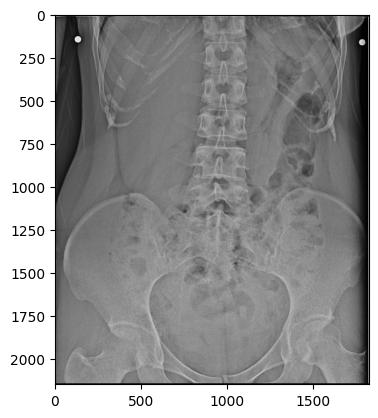

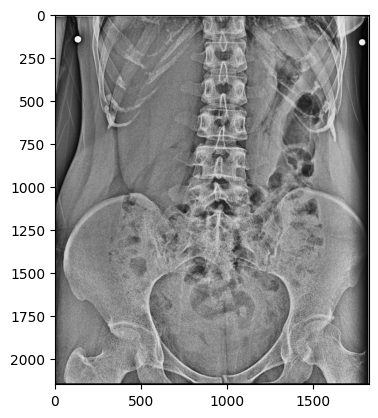

In [15]:
import cv2
import matplotlib.pyplot as plt
image = cv2.imread('/root/hackathon/20230617_FinalLumbarSpine/dataset/AP/images/0.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')
plt.show()

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_image = clahe.apply(image)

plt.imshow(clahe_image, cmap='gray')
plt.show()

In [16]:
import os
import shutil

source_directory = os.path.join(RAW_DATA_DIR, 'train', 'AP')
jpg_destination_directory = os.path.join(TGT_DATA_DIR, 'images')
txt_destination_directory = os.path.join(TGT_DATA_DIR, 'annotations')

# Create the destination directories if they don't exist
os.makedirs(jpg_destination_directory, exist_ok=True)
os.makedirs(txt_destination_directory, exist_ok=True)

# Iterate over all files in the source directory
for filename in os.listdir(source_directory):
    source_file = os.path.join(source_directory, filename)
    
    # Check if the file is a JPG image
    if filename.endswith(".jpg"):
        jpg_destination_file = os.path.join(jpg_destination_directory, filename)
        # 🎯 ADD
        img = cv2.imread(source_file, cv2.IMREAD_GRAYSCALE)
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        clahe_image = clahe.apply(img)
        cv2.imwrite(jpg_destination_file, clahe_image)
        
        # shutil.copy(source_file, jpg_destination_file)
    
    # Check if the file is a text file
    elif filename.endswith(".txt"):
        txt_destination_file = os.path.join(txt_destination_directory, filename)
        shutil.copy(source_file, txt_destination_file)


In [20]:
import os
import shutil
import random

image_directory = os.path.join(TGT_DATA_DIR, 'images')
annotation_directory = os.path.join(TGT_DATA_DIR, 'annotations')
train_directory = os.path.join(TGT_DATA_DIR, 'train')
val_directory = os.path.join(TGT_DATA_DIR, 'val')

# Create the train and validation directories if they don't exist
os.makedirs(os.path.join(train_directory, 'images'), exist_ok=True)
os.makedirs(os.path.join(train_directory, 'annotations'), exist_ok=True)
os.makedirs(os.path.join(val_directory, 'images'), exist_ok=True)
os.makedirs(os.path.join(val_directory, 'annotations'), exist_ok=True)

# Set the validation split ratio (e.g., 20% for validation)
val_ratio = 0.2

# Iterate over all image files in the image directory
for image_filename in os.listdir(image_directory):
    image_file = os.path.join(image_directory, image_filename)
    
    # Check if the file has a corresponding annotation file
    if image_filename.endswith(".jpg") and os.path.exists(os.path.join(annotation_directory, image_filename.replace(".jpg", ".txt"))):
        # Determine the destination directory (train or validation)
        destination_directory = 'train' if random.random() >= val_ratio else 'val'
        
        # Copy the image file to the appropriate directory
        destination_image_file = os.path.join(eval(f'{destination_directory}_directory'), 'images', image_filename)
        shutil.copy(image_file, destination_image_file)
        
        # Copy the corresponding annotation file to the appropriate directory
        annotation_filename = image_filename.replace(".jpg", ".txt")
        annotation_file = os.path.join(annotation_directory, annotation_filename)
        destination_annotation_file = os.path.join(eval(f'{destination_directory}_directory'), 'annotations', annotation_filename)
        shutil.copy(annotation_file, destination_annotation_file)


In [21]:
import os 
os.rename(os.path.join(TGT_DATA_DIR, 'train', 'annotations'), os.path.join(TGT_DATA_DIR, 'train', 'labels'))
os.rename(os.path.join(TGT_DATA_DIR, 'val', 'annotations'), os.path.join(TGT_DATA_DIR, 'val', 'labels'))

In [46]:
# with open("/content/dataset/data.yaml", mode="w") as f:
#   f.write(
#       """
# names:
# - 0
# - 1
# - 2
# - 3
# - 4
# nc: 5
# train: /content/dataset/train/images
# val: /content/dataset/val/images
#       """
#   )


In [22]:
yaml_path = os.path.join(TGT_DATA_DIR, 'data.yaml')

with open(yaml_path, mode="w") as f:
  f.write(
      f"""
train: {os.path.join(TGT_DATA_DIR, 'train', 'images')}
val: {os.path.join(TGT_DATA_DIR, 'val', 'images')}
nc: 5  # Number of classes
names: ['L1','L2','L3','L4','L5']  # List of class names
      """
  )

# YOLOv8

In [23]:
class CFG:
  weight = "yolov8m.pt"
  data = os.path.join(TGT_DATA_DIR, 'data.yaml')
  epochs = 100
  imgsz = 640
  batch = 16
  optimizer = "SGD"
  lr0 = 1e-2
  lrf = 1e-2
  cache=True
  resume=False
  project="yolov8"
  name="AP-HE-x6-e100-i640"

In [24]:
from ultralytics import YOLO

# Load a model
model = YOLO(CFG.weight)  # load a pretrained model (recommended for training)

# Use the model
results = model.train(data=CFG.data, 
                      epochs=CFG.epochs,
                      imgsz=CFG.imgsz,
                      batch=CFG.batch,
                      optimizer=CFG.optimizer,
                      lr0=CFG.lr0,
                      lrf=CFG.lrf,
                      cache=CFG.cache,
                      resume=CFG.resume,
                      project=CFG.project,
                      name=CFG.name)  # train the model

Ultralytics YOLOv8.0.118 🚀 Python-3.11.3 torch-2.0.1+cu117 CUDA:0 (NVIDIA A100-PCIE-40GB, 40536MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/root/hackathon/20230617_FinalLumbarSpine/dataset/AP/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=yolov8, name=AP-HE-x6-e100-i640, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, form

In [52]:
import shutil

# Specify the source directory and destination directory in Google Drive
source_directory = './yolov8'
destination_directory = os.path.join(TGT_DATA_DIR, 'weight')
os.makedirs(destination_directory, exist_ok=True)

# Copy all files from the source directory to the destination directory
shutil.copytree(source_directory, destination_directory)

FileExistsError: [Errno 17] File exists: '/root/hackathon/20230617_FinalLumbarSpine/dataset/AP/weight'